In [ ]:
Question1

In [212]:
import numpy as np
from PIL import Image, ImageTk
T = Image.open('template.png')
T = np.array(T)
P = Image.open('search.png')
P = np.array(P)
n = T.shape[0]*T.shape[1]

In [213]:
def NCC(T, P, n):
    t = 0
    tem = 0
    for RGB in range(T.shape[2]):
        Tmean = np.mean(T[:,:,RGB])
        Pmean = np.mean(P[:,:,RGB])
        Tstd = np.std(T[:,:,RGB])
        Pstd = np.std(T[:,:,RGB])
        Std = Tstd*Pstd
        for nrow in range(T.shape[0]):
            for ncol in range(T.shape[1]):
                tem = tem + (P[nrow, ncol, RGB] - Pmean)*(T[nrow, ncol, RGB] - Tmean)/Std
        t = t + tem/(n-1)
    return t

In [214]:
nrow = P.shape[0] - T.shape[0] 
ncol = P.shape[1] - T.shape[1]
ncc = np.zeros((nrow, ncol))

In [217]:
for i in range(ncc.shape[0]):
    for j in range(ncc.shape[1]):
        ncc[i, j] = NCC(T, P[i:(i + 47), j:(j + 69),:], n)

In [234]:
sort = ncc.flatten()
sort = -np.sort(-sort) # sorting scores

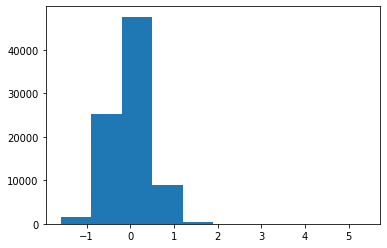

In [260]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(sort)
plt.show() # plot all of the sorting score

In [288]:
closest = [1, 2, 5, 10, 100, 500]
output = []
for i in closest:
    print(sort[(i - 1)])
    x, y = np.where(ncc == sort[(i - 1)])
    output.append(P[x[0]:(x[0] + 47), y[0]:(y[0] + 69),:])

5.376891546258534
5.374994194117244
4.362597098102648
3.758271780829599
1.7042850283905797
1.2161276765336022


In [289]:
t = 0
for i in closest:
    a = output[t]
    cv2.imwrite('elephant'+ str(i) +'.jpg', cv2.cvtColor(a, cv2.COLOR_RGB2BGR))
    t = t + 1

In [ ]:
Question2

In [81]:
import numpy as np
import cv2
from math import pi

# Sobel x-axis kernel
SOBEL_X = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int32")

# Sobel y-axis kernel
SOBEL_Y = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int32")

def gaussian_smooth(size = 3):
    x, y = np.mgrid[-(size-2):(size-1), -(size-2):(size-1)]
    gaussian_kernel = np.multiply(1/(2*pi*(9**2)), np.exp(-(x**2+y**2)/(2*(9**2))))
    gaussian_kernel = gaussian_kernel / gaussian_kernel.sum()
    return gaussian_kernel
GAUSS = gaussian_smooth(9)

def convolve(img, kernel):
    """Performs a naive convolution."""
    if kernel.shape[0] % 2 != 1 or kernel.shape[1] % 2 != 1:
        raise ValueError("Only odd dimensions on filter supported")

    img_height = img.shape[0]
    img_width = img.shape[1]
    pad_height = kernel.shape[0] // 2
    pad_width = kernel.shape[1] // 2
    # Allocate result image.
    pad = ((pad_height, pad_height), (pad_height, pad_width))
    g = np.empty(img.shape, dtype=np.float64)
    img = np.pad(img, pad, mode='constant', constant_values=0)
    # Do convolution
    for i in np.arange(pad_height, img_height+pad_height):
        for j in np.arange(pad_width, img_width+pad_width):
            roi = img[i - pad_height:i + pad_height +
                      1, j - pad_width:j + pad_width + 1]
            g[i - pad_height, j - pad_width] = (roi*kernel).sum()

    if (g.dtype == np.float64):
        kernel = kernel / 255.0
        kernel = (kernel*255).astype(np.uint8)
    else:
        g = g + abs(np.amin(g))
        g = g / np.amax(g)
        g = (g*255.0)

    return g


def harris(img, threshold = 127, alpha = 0.06):
    global R
    img_cpy = img.copy()
    zero = np.zeros(shape = img.shape)
    # Grayscale
    img1_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # sharpen
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    iimg1_gray = cv2.filter2D(img1_gray, -1, kernel)

    dx = convolve(img1_gray, SOBEL_X)
    dy = convolve(img1_gray, SOBEL_Y)

    dx2 = np.square(dx)
    dy2 = np.square(dy)
    dxdy = dx*dy

    g_dx2 = convolve(dx2, GAUSS)
    g_dy2 = convolve(dy2, GAUSS)
    g_dxdy = convolve(dxdy, GAUSS)

    R = g_dx2*g_dy2 - np.square(g_dxdy) - alpha*np.square(g_dx2 + g_dy2)
    R *= 255.0/R.max() 
    # find all points above threshold
    loc = np.where(R >= threshold)
    # loop though the points
    for pt in zip(*loc[::-1]):
        # draw filled circle on each point
        cv2.circle(img_cpy, pt, 5, (255, 0, 0), -1)
    return img_cpy

In [87]:
b = cv2.imread('Desktop/高等影像處理/斑馬線辨識/03.jpg')
c = harris(b, 80, 0.06)

In [88]:
cv2.imwrite('Desktop/qq.jpg', c)

True

In [84]:
np.where(R > 80)

(array([  1,   2,   2, ..., 676, 676, 677]),
 array([1018, 1016, 1017, ...,  473,  474,  469]))

In [72]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(c, -1, kernel)

In [73]:
cv2.imwrite('Desktop/qq.jpg', im)

True